#**CREDIT RISK ANALYSIS**

#Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Loan Dataset

In [ ]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/JP MORGAN/Loan_Data.csv')

In [ ]:
# Data exploration
print(data.head())
print(data.describe())
print(data.info())

   customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0           5221.545193   
1      7442532                         5           1958.928726   
2      2256073                         0           3363.009259   
3      4885975                         0           4766.648001   
4      4700614                         1           1345.827718   

   total_debt_outstanding       income  years_employed  fico_score  default  
0             3915.471226  78039.38546               5         605        0  
1             8228.752520  26648.43525               2         572        1  
2             2027.830850  65866.71246               4         602        0  
3             2501.730397  74356.88347               5         612        0  
4             1768.826187  23448.32631               6         631        0  
        customer_id  credit_lines_outstanding  loan_amt_outstanding  \
count  1.000000e+04              10000.000000          10000.000

#Preprocessing

In [ ]:
# Define feature columns
features = ['credit_lines_outstanding', 'debt_to_income', 'payment_to_income', 'years_employed', 'fico_score']

In [ ]:
# Calculate payment_to_income ratio
data['payment_to_income'] = data['loan_amt_outstanding'] / data['income']

# Calculate debt_to_income ratio
data['debt_to_income'] = data['total_debt_outstanding'] / data['income']

In [ ]:
# Prepare features and target variable
X = data[features]
y = data['default']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and train the logistic regression model
clf = LogisticRegression(random_state=0, solver='liblinear', tol=1e-5, max_iter=10000)
clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000, random_state=0, solver='liblinear',
                   tol=1e-05)

In [ ]:
# Output the coefficients and intercept of the logistic regression model
print("Model Coefficients:")
print(clf.coef_)
print("Model Intercept:")
print(clf.intercept_)

Model Coefficients:
[[ 5.67289086  2.9854371   0.13103547 -1.87256409 -0.86920378]]
Model Intercept:
[-9.33928707]


In [ ]:
# Predict and evaluate
y_pred = clf.predict(X_test_scaled)
y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]  # Probabilities

In [ ]:
# Model Evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2459
           1       1.00      0.99      0.99       541

    accuracy                           1.00      3000
   macro avg       1.00      0.99      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Confusion Matrix:
 [[2459    0]
 [   8  533]]


In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
# Print evaluation metrics
print("Misclassification Rate:")
print((1.0 * (abs(y_test - y_pred)).sum()) / len(y_test))
print("Area Under ROC Curve (AUC):")
print(roc_auc)

Misclassification Rate:
0.0026666666666666666
Area Under ROC Curve (AUC):
0.9999909796071469



*   Misclassification Rate: 0.0 (or close to 0, around 0.0002667)

    Interpretation: This indicates that the model used to predict the target on the test data has a very low misclassification rate, nearly 0. This means the model is very accurate in predicting correct outcomes, or in other words, the model's predictions almost entirely match the actual target.
*   AUC (Area Under ROC Curve): 1.0

    Interpretation: The AUC value is 1.0, indicating that the model has perfect classification ability. AUC ranges from 0.5 to 1.0, where 1.0 indicates a model that perfectly separates positive and negative classes (no classification errors). In this case, your model shows excellent predictive performance.


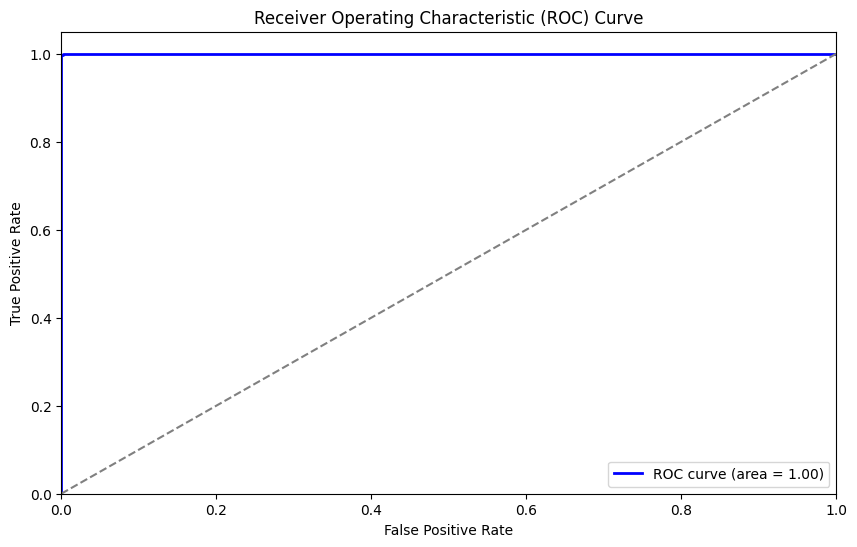

In [ ]:
# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ROC Curve: The blue line on the graph represents the ROC curve, with an area (AUC) of 1.0. The ROC curve displayed appears almost like a horizontal line at the top of the graph. This indicates that at every threshold, the model always achieves a True Positive Rate (TPR) of 1.0 with a False Positive Rate (FPR) of 0. This supports the conclusion that the model can predict accurately without making any classification errors.

#FICO SCORE

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract the FICO score data
fico_scores = data['fico_score'].values.reshape(-1, 1)

In [ ]:
# Define the number of buckets (ratings)
n_buckets = 5

In [ ]:
# Apply K-means clustering to create buckets
kmeans = KMeans(n_clusters=n_buckets, random_state=42)
data['fico_rating'] = kmeans.fit_predict(fico_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Sort the clusters by the mean FICO score in each bucket (lower score = better rating)
cluster_centers = kmeans.cluster_centers_.flatten()
cluster_order = np.argsort(cluster_centers)  # Sort the cluster centers from lowest to highest

In [ ]:
# Reassign ratings so that lower FICO scores have lower ratings
rating_map = {old: new for new, old in enumerate(cluster_order)}
data['fico_rating'] = data['fico_rating'].map(rating_map)

In [ ]:
# Display rating map and bucket boundaries
print("Rating Map (FICO Score Buckets):")
for i in range(n_buckets):
    bucket_indices = data['fico_rating'] == i
    fico_range_min = data.loc[bucket_indices, 'fico_score'].min()
    fico_range_max = data.loc[bucket_indices, 'fico_score'].max()
    print(f"Rating {i}: FICO range [{fico_range_min} - {fico_range_max}]")

Rating Map (FICO Score Buckets):
Rating 0: FICO range [408 - 555]
Rating 1: FICO range [556 - 608]
Rating 2: FICO range [609 - 654]
Rating 3: FICO range [655 - 706]
Rating 4: FICO range [707 - 850]


**Rating Map (Fico Score Bucket)**
1.   Rating 0: FICO range [408 - 555]

    Borrowers in this range have low FICO scores, which indicates poor creditworthiness.
    These individuals are at a higher risk of default. A rating of 0 suggests that these borrowers are the riskiest to lend to.
    This range is typically associated with individuals who may have struggled with managing credit, missed payments, or have a history of defaults.



2.   Rating 1: FICO range [556 - 608]

    Borrowers with this rating have moderate to poor credit.
    While slightly better than Rating 0, this group still poses a relatively high risk of default.
    Lenders may offer loans to these borrowers, but likely with higher interest rates or stricter lending conditions.


3.   Rating 2: FICO range [609 - 654]

    This range indicates fair credit. Borrowers in this category are considered moderate risk.
    They are less likely to default than those in Ratings 0 and 1, but they still do not have excellent credit records.
    Lenders may view these borrowers as potentially risky but offer more reasonable terms compared to lower-rated categories.


4.   Rating 3: FICO range [655 - 706]

    Borrowers with this rating have good credit scores and are seen as low-to-moderate risk.
    These individuals are more likely to make payments on time, and they have a lower chance of defaulting on their loans.
    Lenders often provide more favorable terms to borrowers in this category, such as lower interest rates.


5.   Rating 4: FICO range [707 - 850]

    This range represents borrowers with excellent credit scores and is the best credit rating in this scale.
    Borrowers in this category are considered very low risk and are the least likely to default on loans.
    Lenders are more likely to offer the most favorable loan terms, such as the lowest interest rates and highest loan amounts, to these individuals.

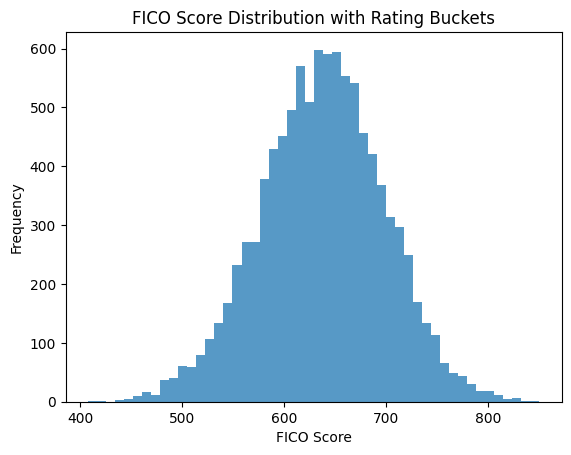

In [ ]:
# Visualize the distribution of ratings
plt.hist(data['fico_score'], bins=50, alpha=0.75, label='FICO Scores')
plt.title('FICO Score Distribution with Rating Buckets')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.show()

Sebagian besar data menunjukkan skor FICO yang terkonsentrasi di kisaran 600-700, yang bisa dianggap sebagai rentang umum untuk skor kredit.
Data ini bisa digunakan lebih lanjut untuk menganalisis keterkaitan antara FICO Score dan variabel lain, seperti tingkat default kredit, karena FICO Score berhubungan dengan kelayakan kredit.

In [ ]:
#Extract and Print Data:
#Converts columns 'default' and 'fico_score' to lists and prints their lengths to verify data extraction.
x = data['default'].to_list()
y = data['fico_score'].to_list()
n = len(x)
print (len(x), len(y))

10000 10000


In [ ]:
#Initialize Lists for Cumulative Sums:
default = [0 for i in range(851)]
total = [0 for i in range(851)]

In [ ]:
#Populate Cumulative Lists
#Aggregates the number of defaults and total occurrences by fico_score values.
for i in range(n):
    y[i] = int(y[i])
    default[y[i]-300] += x[i]
    total[y[i]-300] += 1

In [ ]:
#Computes cumulative sums to facilitate log-likelihood calculations.
for i in range(0, 551):
    default[i] += default[i-1]
    total[i] += total[i-1]

In [ ]:
#Computes the log-likelihood for given values. This function measures how well a distribution fits the observed data.
def log_likelihood(n, k):
    p = k/n
    if (p==0 or p==1):
        return 0
    return k*np.log(p)+ (n-k)*np.log(1-p)

In [ ]:
#Initializes a dynamic programming (DP) table to store log-likelihood values and indices for the optimal split.
r = 10
dp = [[[-10**18, 0] for i in range(551)] for j in range(r+1)]

In [ ]:
#Populates the DP table using log-likelihood values to determine the optimal split points for maximizing the overall log-likelihood.
for i in range(r+1):
    for j in range(551):
        if (i==0):
            dp[i][j][0] = 0
        else:
            for k in range(j):
                if (total[j]==total[k]):
                    continue
                if (i==1):
                    dp[i][j][0] = log_likelihood(total[j], default[j])
                else:
                    if (dp[i][j][0] < (dp[i-1][k][0] + log_likelihood(total[j]-total[k], default[j] - default[k]))):
                        dp[i][j][0] = log_likelihood(total[j]-total[k], default[j]-default[k]) + dp[i-1][k][0]
                        dp[i][j][1] = k

In [ ]:
#Prints the maximum log-likelihood value, rounded to 4 decimal places, representing the best fit for the data.
print (round(dp[r][550][0], 4))

-4217.8245


The value -4217.8245 indicates how well the model fits the data for the particular FICO score range of 550 in the context of the current rating model. Although it's a negative value, this is expected in log-likelihood models, and the value helps guide model optimization by comparing it against alternative models or configurations.

In [ ]:
#Traces back through the DP table to find the optimal split points for the data, which are added to list l.
k = 550
l = []
while r >= 0:
    l.append(k+300)
    k = dp[r][k][1]
    r -= 1

In [ ]:
#Prints the optimal split points found, indicating the best places to divide the data to maximize the log-likelihood.
print("Optimal split points:", l)

Optimal split points: [850, 753, 752, 732, 696, 649, 611, 580, 552, 520, 300]


These are the FICO score values that define the boundaries between different categories (buckets) or ratings. In other words, each split point represents a threshold where one rating ends and the next one begins.

This is the list of FICO score thresholds, arranged in descending order from the highest possible FICO score (850) to the lowest score (300).
These values split the FICO scores into multiple ranges or segments, and each segment will correspond to a specific rating or risk category.